22科技一班
202224111120
段志清

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

训练集样本数: 392
测试集样本数: 98
截距(Intercept): [19.81059047]
系数(Coefficients): [[ 3.88235108 -0.85618638 -0.51535387]]


C:\Users\Museum\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


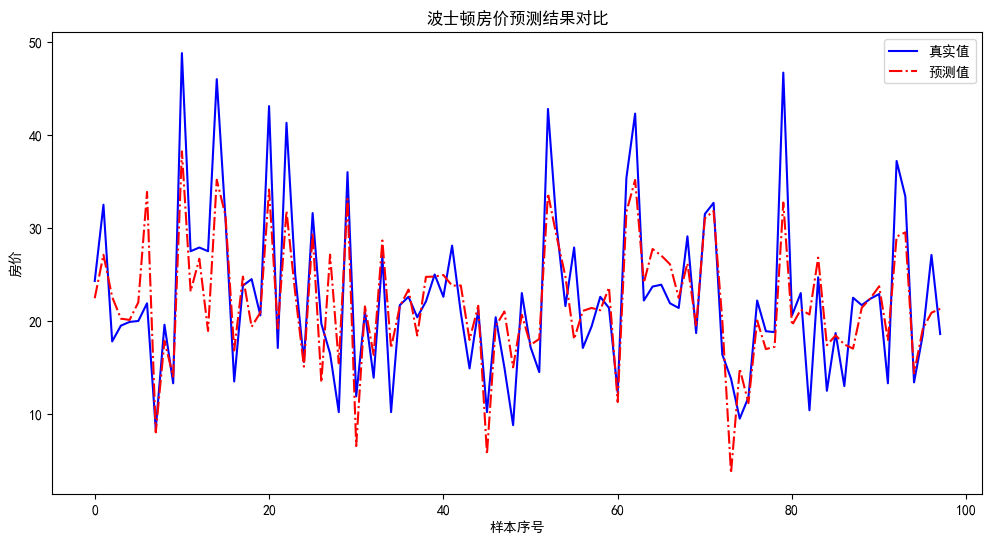

模型R²得分: 0.7062014880668346


In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 加载波士顿房价数据集（注意：新版scikit-learn已移除该数据集，需手动下载或改用替代数据集）
# 这里使用替代方法加载（示例数据）
bos = datasets.fetch_openml(name='boston', version=1, as_frame=True)
x = bos.data
y = bos.target

# 转换为DataFrame并删除无关特征
df = pd.DataFrame(x, columns=bos.feature_names)
features_to_drop = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B']
x = df.drop(features_to_drop, axis=1)

# 删除房价等于50
tmp_row = []
for i in range(len(y)):
    if y[i] == 50:
        tmp_row.append(i)
x = x.drop(tmp_row)
y = pd.DataFrame(y).drop(tmp_row)

# 分割数据集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)
print("训练集样本数:", len(X_train))
print("测试集样本数:", len(X_test))

# 训练线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 输出模型参数
print("截距(Intercept):", lr.intercept_)
print("系数(Coefficients):", lr.coef_)

# 预测测试集
y_pred = lr.predict(X_test)

# 可视化真实值与预测值
plt.figure(figsize=(12, 6))
plt.plot(range(y_test.shape[0]), y_test, color='blue', linewidth=1.5, linestyle='-', label="真实值")
plt.plot(range(y_test.shape[0]), y_pred, color='red', linewidth=1.5, linestyle='-.', label="预测值")
plt.legend()
plt.title("波士顿房价预测结果对比")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.show()

# 计算R²得分（评估模型）
score = r2_score(y_test, y_pred)
print("模型R²得分:", score)